# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
weather_api_key

'e0fcc32e6c2da6fc0cb66e72a5fc37fc'

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | lazaro cardenas
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | paracin
Processing Record 6 of Set 1 | pacific grove
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | marsaskala
City not found. Skipping...
Processing Record 10 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | solleftea
Processing Record 15 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 16 of Set 1 | banda aceh
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | vilyuysk
Processing Record 19 of Set 1 | st. john's
Processing Record 20 of S

Processing Record 41 of Set 4 | muynoq
Processing Record 42 of Set 4 | solrod strand
Processing Record 43 of Set 4 | tvoroyri
Processing Record 44 of Set 4 | las heras
Processing Record 45 of Set 4 | vernon
Processing Record 46 of Set 4 | lautoka
Processing Record 47 of Set 4 | adrar
Processing Record 48 of Set 4 | puerto baquerizo moreno
Processing Record 49 of Set 4 | illizi
Processing Record 0 of Set 5 | el fasher
Processing Record 1 of Set 5 | alajarvi
Processing Record 2 of Set 5 | taiohae
City not found. Skipping...
Processing Record 3 of Set 5 | new norfolk
Processing Record 4 of Set 5 | tabas
Processing Record 5 of Set 5 | iron river
Processing Record 6 of Set 5 | remire-montjoly
Processing Record 7 of Set 5 | fale old settlement
Processing Record 8 of Set 5 | ujae
Processing Record 9 of Set 5 | turkmenbasy
Processing Record 10 of Set 5 | sofifi
City not found. Skipping...
Processing Record 11 of Set 5 | solnechnyy
Processing Record 12 of Set 5 | callao
Processing Record 13 of 

Processing Record 27 of Set 8 | saveh
Processing Record 28 of Set 8 | batang
Processing Record 29 of Set 8 | sandikli
Processing Record 30 of Set 8 | perth
Processing Record 31 of Set 8 | carbonear
Processing Record 32 of Set 8 | sheridan
Processing Record 33 of Set 8 | freetown
Processing Record 34 of Set 8 | shushtar
Processing Record 35 of Set 8 | uporovo
Processing Record 36 of Set 8 | nar'yan-mar
Processing Record 37 of Set 8 | kavieng
Processing Record 38 of Set 8 | islamkot
Processing Record 39 of Set 8 | hobyo
Processing Record 40 of Set 8 | hede
Processing Record 41 of Set 8 | maceio
Processing Record 42 of Set 8 | uzundere
Processing Record 43 of Set 8 | pont rouge
Processing Record 44 of Set 8 | calintaan
Processing Record 45 of Set 8 | mugia
Processing Record 46 of Set 8 | christchurch
Processing Record 47 of Set 8 | panjakent
Processing Record 48 of Set 8 | natal
Processing Record 49 of Set 8 | ambovombe
Processing Record 0 of Set 9 | viedma
Processing Record 1 of Set 9 | 

Processing Record 16 of Set 12 | haapajarvi
Processing Record 17 of Set 12 | naryshkino
Processing Record 18 of Set 12 | aktobe
Processing Record 19 of Set 12 | santo antonio do ica
Processing Record 20 of Set 12 | madhoganj
Processing Record 21 of Set 12 | sao paulo de olivenca
Processing Record 22 of Set 12 | qui nhon
Processing Record 23 of Set 12 | robore
Processing Record 24 of Set 12 | nabire
Processing Record 25 of Set 12 | laguna
Processing Record 26 of Set 12 | salinopolis
Processing Record 27 of Set 12 | kitimat
Processing Record 28 of Set 12 | kirkuk
Processing Record 29 of Set 12 | umba
Processing Record 30 of Set 12 | kone
Processing Record 31 of Set 12 | muli
Processing Record 32 of Set 12 | kataragama
City not found. Skipping...
Processing Record 33 of Set 12 | mahdia
Processing Record 34 of Set 12 | lae
Processing Record 35 of Set 12 | sheregesh
Processing Record 36 of Set 12 | luganville
Processing Record 37 of Set 12 | geraldton
Processing Record 38 of Set 12 | charte

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,274.70,66,100,18.07,TF,1716997049
1,puerto natales,-51.7236,-72.4875,276.40,75,20,8.75,CL,1716997049
2,lazaro cardenas,17.9583,-102.2000,304.87,48,4,1.48,MX,1716997049
3,grytviken,-54.2811,-36.5092,274.79,91,100,6.02,GS,1716997050
4,paracin,43.8608,21.4078,292.75,81,93,3.08,RS,1716997050


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,274.70,66,100,18.07,TF,1716997049
1,puerto natales,-51.7236,-72.4875,276.40,75,20,8.75,CL,1716997049
2,lazaro cardenas,17.9583,-102.2000,304.87,48,4,1.48,MX,1716997049
3,grytviken,-54.2811,-36.5092,274.79,91,100,6.02,GS,1716997050
4,paracin,43.8608,21.4078,292.75,81,93,3.08,RS,1716997050


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

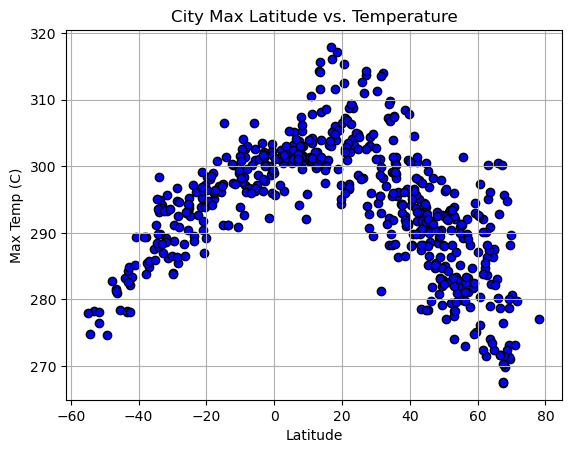

In [10]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']
plt.scatter(x,y,marker='o',facecolors='blue',edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.title('City Max Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

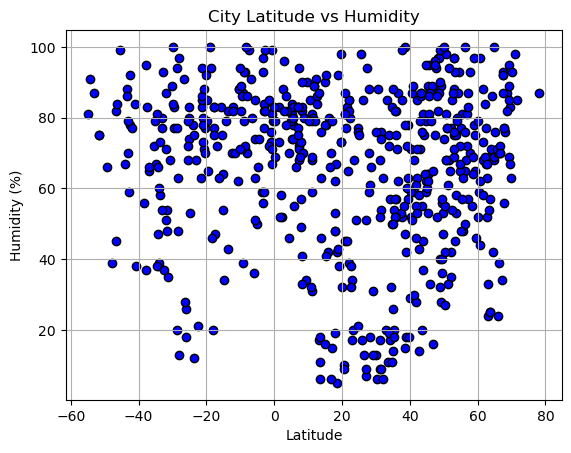

In [11]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.scatter(x,y,marker='o',facecolors='blue',edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

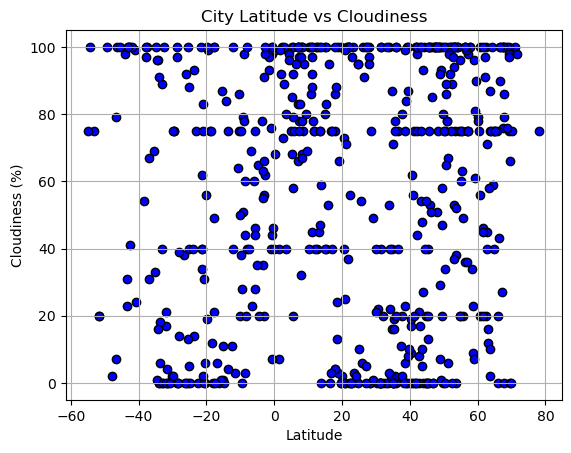

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.scatter(x,y,marker='o',facecolors='blue',edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

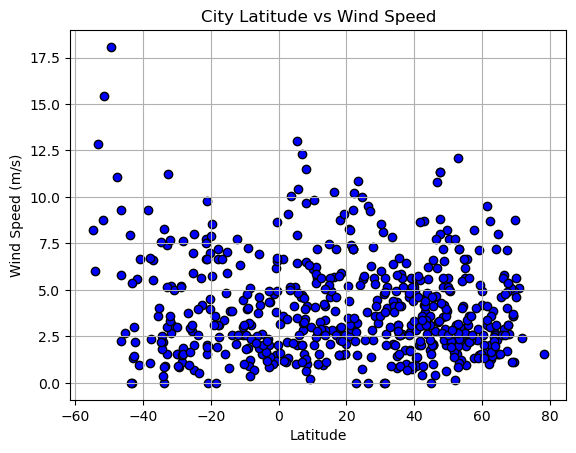

In [13]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.scatter(x,y,marker='o',facecolors='blue',edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def regression_plot(x,y,y_col,hemi):
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y,marker='o',facecolors='blue',edgecolors='black')
    plt.plot(x,regress_values,'r-')
    plt.annotate(line_eq,(min(x),min(y)),fontsize=12,color='red')
    plt.xlabel("Latitude (" + hemi +")")
    plt.ylabel(y_col)
    print('r-value is: ' + str(rvalue **2))
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,lazaro cardenas,17.9583,-102.2000,304.87,48,4,1.48,MX,1716997049
4,paracin,43.8608,21.4078,292.75,81,93,3.08,RS,1716997050
5,pacific grove,36.6177,-121.9166,286.42,87,75,5.14,US,1716997050
6,georgetown,5.4112,100.3354,303.12,80,20,2.06,MY,1716996835
7,bethel,41.3712,-73.4140,296.60,59,75,2.06,US,1716997050


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0,:]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,274.70,66,100,18.07,TF,1716997049
1,puerto natales,-51.7236,-72.4875,276.40,75,20,8.75,CL,1716997049
3,grytviken,-54.2811,-36.5092,274.79,91,100,6.02,GS,1716997050
8,port alfred,-33.5906,26.8910,294.92,58,6,0.92,ZA,1716997051
9,port elizabeth,-33.9180,25.5701,298.31,38,0,0.00,ZA,1716997051


###  Temperature vs. Latitude Linear Regression Plot

r-value is: 0.5622899992587732


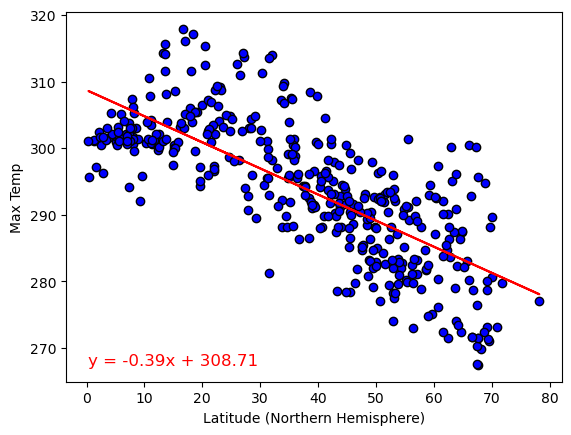

In [17]:
# Linear regression on Northern Hemisphere
regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Max Temp','Northern Hemisphere')

r-value is: 0.7400916554475467


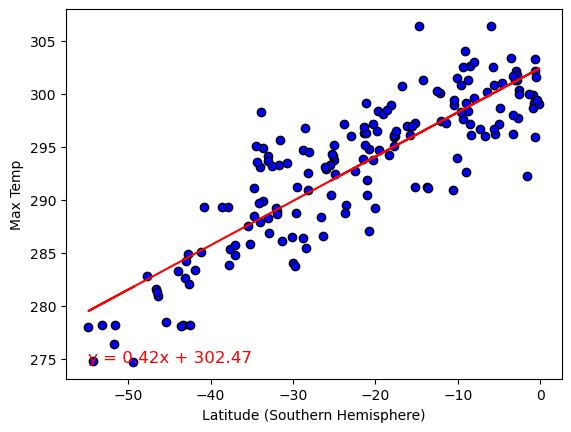

In [18]:
# Linear regression on Southern Hemisphere
regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Max Temp','Southern Hemisphere')

**Discussion about the linear relationship: I am seeing a strong correlation between latidude and temperature.  In the Northern Hemisphere, as you increase in latitude, temperature drops, meaning moving further away from the equator.  In the Southern Hemisphere the same thing is happening, as you move closer to the equator, the temperature rises.

### Humidity vs. Latitude Linear Regression Plot

r-value is: 0.010002755854455354


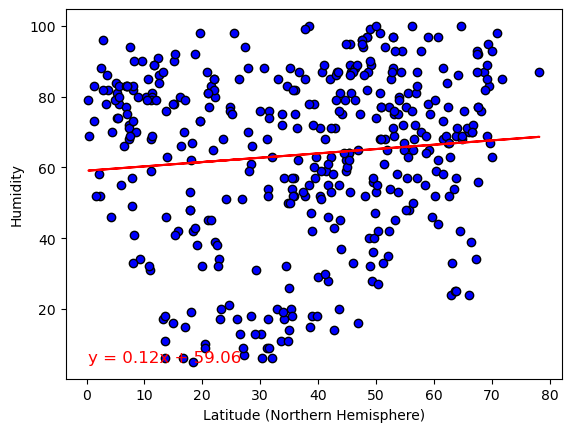

In [19]:
# Northern Hemisphere
regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Humidity','Northern Hemisphere')

r-value is: 0.018157153377817543


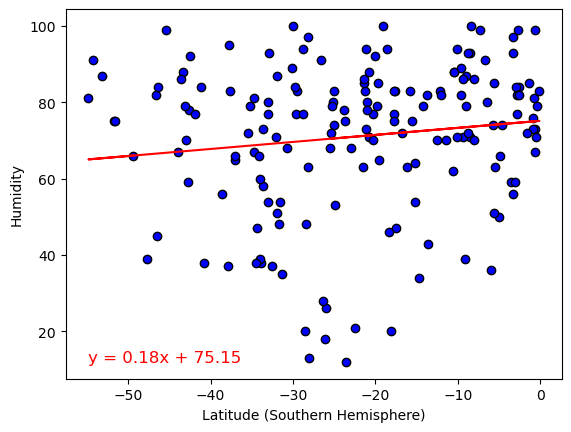

In [20]:
# Southern Hemisphere
regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Humidity','Southern Hemisphere')

**Discussion about the linear relationship:** There is not nearly as strong of a correlation between latidude and humidity as there was with temperature.  It seems the most variability is between -30 and the equator and up to 30 latitude and the equator.

### Cloudiness vs. Latitude Linear Regression Plot

r-value is: 0.0009447081486949467


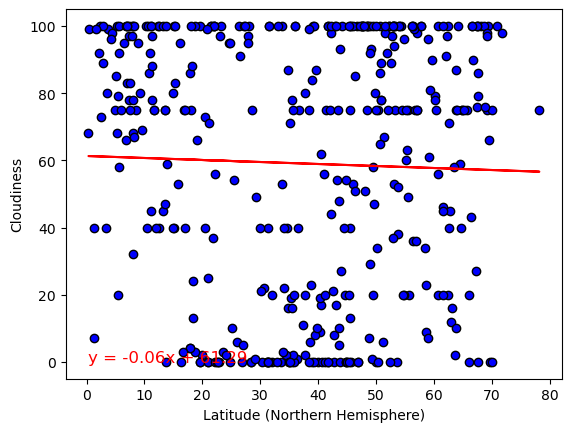

In [21]:
# Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness', 'Northern Hemisphere')


r-value is: 8.36761443234117e-05


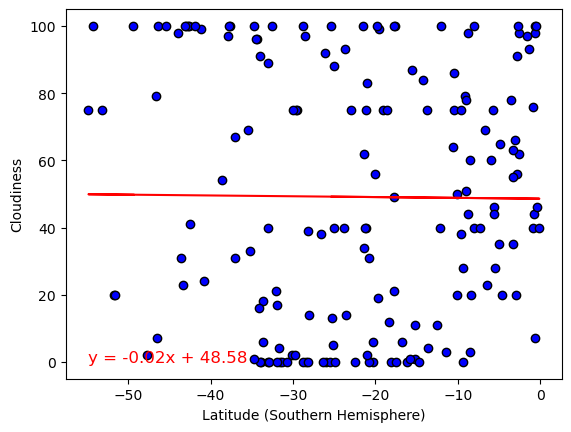

In [22]:
# Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness', 'Southern Hemisphere')


**Discussion about the linear relationship:** According to my plots, there is not much correlation between cloudiness and latitude.  It seems to be pretty all over the place regardless of latitude or hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

r-value is: 0.01384111111943231


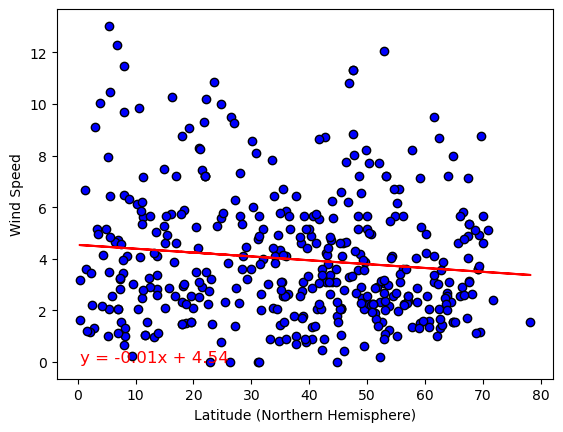

In [23]:
# Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed', 'Northern Hemisphere')


r-value is: 0.07568905377251918


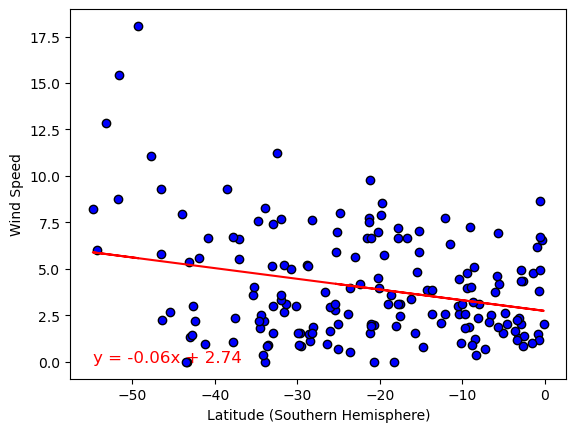

In [24]:
# Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed', 'Southern Hemisphere')


**Discussion about the linear relationship:** There is hardly any correlation in the northern hemisphere, in the southern hemisphere we can see wind speeds generally decrease as we move closer to the equator, with more variability away from the equator.  The variability looks the same regardless of latitude in the northern hemisphere